### Use Pygalmesh to generate a sphere 

In [11]:
import pygalmesh
import numpy as np

x_ = np.linspace(-1.0, 1.0, 50)
y_ = np.linspace(-1.0, 1.0, 50)
z_ = np.linspace(-1.0, 1.0, 50)
x, y, z = np.meshgrid(x_, y_, z_)

vol = np.empty((50, 50, 50), dtype=np.uint8)
idx = x**2 + y**2 + z**2 < 0.5**2
vol[idx] = 1
vol[~idx] = 0

voxel_size = (0.1, 0.1, 0.1)

p_mesh = pygalmesh.generate_from_array(
    vol, voxel_size, max_facet_distance=0.2, max_cell_circumradius=0.15
)
p_mesh.write("pygalmesh_sphere.stl")

Warning: STL can only write triangle cells. Discarding tetra.

### Use Pygalmesh to mesh a vascular

In [40]:
import os 
from skimage import io, measure
from scipy import ndimage
from stl import mesh
import numpy as np
from scipy.ndimage import gaussian_filter

# path = '../vessels/volumes/Lnet_d20_dr12_epsilon9_iter13_SD500_v1_t0_512x512x280_nofluid.tiff'
path = "../vessels/volumes/Lnet_d35_dr20_epsilon10_iter8_SD500_v1_t0_512x512x280_nofluid.tiff"

vessel_v = io.imread(path)

# # Smoothing
# vessel_v = gaussian_filter(vessel_v, sigma=10)

voxel_size = (0.1, 0.1, 0.1)

p_mesh = pygalmesh.generate_from_array(
    vessel_v, voxel_size, max_facet_distance= 0.2, max_cell_circumradius= 0.2
)

p_mesh.write("pygalmesh_vessel.stl")

Warning: STL can only write triangle cells. Discarding tetra.

### Use skimage measure to mesh a shpere

In [11]:
import os 
from skimage import io, measure
from scipy import ndimage
from stl import mesh
import numpy as np


# vessel_v = ndimage.spline_filter(vessel_v, order=5)
verts, faces, normals, values = measure.marching_cubes(vol, 0.5)

obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]
obj_3d.save("shpere.stl")

### Use vedo to mesh

2024-05-09 14:04:33.862 (8719.819s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2322  INFO| Executing Surface Nets 3D
2024-05-09 14:04:33.953 (8719.909s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2394  INFO| Extracted: 226697 points, 226742 quads
2024-05-09 14:04:33.953 (8719.909s) [    72164C607B80]   vtkSurfaceNets3D.cxx:1816  INFO| Smoothing output
2024-05-09 14:04:33.953 (8719.909s) [    72164C607B80]vtkConstrainedSmoothing:448   INFO| Executing constrained smoothing filter
2024-05-09 14:04:33.996 (8719.952s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2032  INFO| Transforming output mesh type to: 1
2024-05-09 14:04:34.002 (8719.958s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2447  INFO| Triangulated to produce: 453484 triangles
2024-05-09 14:04:34.002 (8719.959s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2322  INFO| Executing Surface Nets 3D
2024-05-09 14:04:34.096 (8720.052s) [    72164C607B80]   vtkSurfaceNets3D.cxx:2394  INFO| Extracted: 226697 points, 226742 quads
2024-05-09 14:04


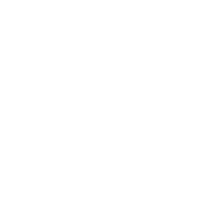

In [41]:
# %matplotlib inline
from vedo import dataurl, Plotter, Volume, show

path = "../vessels/volumes/Lnet_d35_dr20_epsilon10_iter8_SD500_v1_t0_512x512x280_nofluid.tiff"

# Load a mesh and show it
vol = Volume(vessel_v)

# m0 = vol.isosurface(flying_edges=False).normalize()
isovalues = [0,255]
m0 = vol.isosurface_discrete(isovalues, nsmooth=12)
# m0.lw(1).c("violet")

#------------------------------------------------
# Smooth the mesh
m1 = m0.clone().smooth(niter=20, boundary=True)
m1.color("lg")

plt = Plotter(N=2)
plt.at(0).background("light blue")  # set first renderer color
plt.show(m0, "Original Mesh:")

plt.at(1)
plt.show("Mesh polygons are smoothed:", m1, viewup="z", zoom=1.5)
m0.write('vedo_vascular.stl')
# plt.interactive()

In [37]:
print(vol)

vedo.volume.Volume at (0x5d67c3e3e570)                                     
name          : Volume
filename      : ../vessels/volumes/Lnet_d35_dr20_epsilon10_iter8_SD500_v1_t0_512x512x280_nofluid.tiff
dimensions    : [280 512 512]
origin        : (0, 0, 0)
center        : (139.500, 255.500, 255.500)
spacing       : (1.00000, 1.00000, 1.00000)
bounds        : x=(0, 279), y=(0, 511), z=(0, 511)
memory size   : 70 MB
scalar size   : 1 bytes (unsigned char)
scalar range  : (0.0, 255.0)
